In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import glob
import os,sys
# Import Python Libraries
import iris
import iris.plot as iplt
from iris.analysis import MEAN, MAX, SUM, COUNT
import copy
from collections import  OrderedDict

import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)

acpc_workspace='/group_workspaces/jasmin2/acpc'
sys.path.append('/home/users/pmarinescu/acpc_intercomparison_3')
sys.path.append('/home/users/pmarinescu')
from acpc_intercomparison import load_variable_cube,color,variable_names,directory,filename
#from Setup_intercomparison import load_variable_cube,color,variable_names,directory,filename
from collections import  OrderedDict


In [3]:
# COSMO_KIT  MesoNH_Toulouse  RAMS_CSU  UM_LEEDS  WRF_NASA  WRF_OXF  WRF_PNNL
models = []
models.append('COSMO_KIT')
models.append('MesoNH_Toulouse')
models.append('RAMS_CSU')
models.append('UM_LEEDS')
models.append('WRF_NASA')
models.append('WRF_OXF')
models.append('WRF_PNNL')

mn = OrderedDict()
mn['COSMO_KIT'] = ['COSMO']
mn['MesoNH_Toulouse'] = ['MesoNH']
mn['RAMS_CSU'] = ['RAMS']
mn['UM_LEEDS'] = ['UM']
mn['WRF_NASA'] = ['NU-WRF']
mn['WRF_OXF'] = ['WRF-Morr']
mn['WRF_PNNL'] = ['WRF-SBM']

dx = '500m'
dt = '5m'


In [4]:
pn = OrderedDict()
pn['COSMO_KIT'] = ['(a)','(h)','(o)']
pn['MesoNH_Toulouse'] = ['(b)','(i)','(p)']
pn['RAMS_CSU'] = ['(c)','(j)','(q)']
pn['UM_LEEDS'] = ['(d)','(k)','(r)']
pn['WRF_NASA'] = ['(e)','(l)','(s)']
pn['WRF_OXF'] = ['(f)','(m)','(t)']
pn['WRF_PNNL'] = ['(g)','(n)','(u)']

In [5]:
import pickle
z_filename = '/group_workspaces/jasmin2/acpc/users/pmarin/Z_temp_levels.p'
z_0C,z_38C = pickle.load(open(z_filename,'rb'))

Term_QV_v2


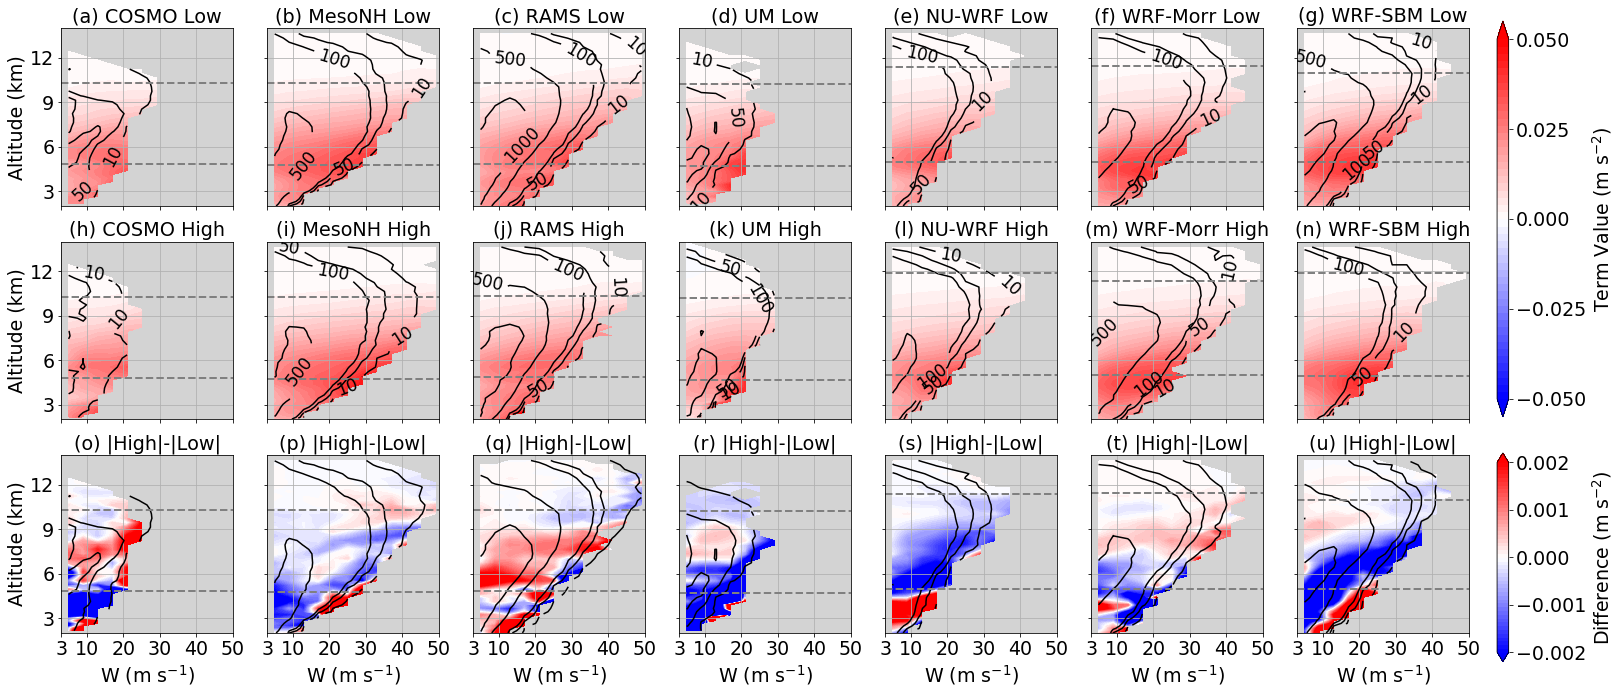

In [9]:
w_mid_c = OrderedDict()
alt_c = OrderedDict()
t_avg_c = OrderedDict()
w_cnt_c = OrderedDict()
w_avg_c = OrderedDict()
w_med_c = OrderedDict()
t_med_c = OrderedDict()
t_75_c = OrderedDict()

w_mid_p = OrderedDict()
alt_p = OrderedDict()
t_avg_p = OrderedDict()
w_cnt_p = OrderedDict()
w_avg_p = OrderedDict()
w_med_p = OrderedDict()
t_med_p = OrderedDict()
t_75_p = OrderedDict()

for model in models:
    w_mid_c[model] = OrderedDict()
    alt_c[model] = OrderedDict()
    t_avg_c[model] = OrderedDict()
    w_cnt_c[model] = OrderedDict()
    w_avg_c[model] = OrderedDict()
    w_med_c[model] = OrderedDict()
    t_med_c[model] = OrderedDict()
    t_75_c[model] = OrderedDict()

    w_mid_p[model] = OrderedDict()
    alt_p[model] = OrderedDict()
    t_avg_p[model] = OrderedDict()
    w_cnt_p[model] = OrderedDict()
    w_avg_p[model] = OrderedDict()
    w_med_p[model] = OrderedDict()
    t_med_p[model] = OrderedDict()
    t_75_p[model] = OrderedDict()
    
t_lvls = np.arange(-0.25,0.25001,0.005); t2_lvls = t_lvls/6
tick_levels = np.arange(-0.25,0.25001,0.05); tick_levels2 = np.arange(-0.04,0.04001,0.02); 
hline_color = 'gray'
hline_size = 2

fs2 = 19
fsc = 17
ylims = [2,14]
xlims = [3,50]
xticks = [3,10,20,30,40,50]
yticks = [3,6,9,12]
bgc = "lightgray"
#for ii in [0,3,4,5,6]:

#for ii in [7]:
for ii in [1]:
    if ii == 0:
        tf = 'Term_TH_v2'; 
        #t_lvls = np.arange(-0.25,0.25001,0.005); t2_lvls = t_lvls/6
        #tick_levels = np.arange(-0.25,0.25001,0.05); tick_levels2 = np.arange(-0.03,0.03001,0.01); 

        #term_filename = 'Term_T'; 
    elif ii == 1:
        tf = 'Term_QV_v2';
        t_lvls = np.arange(-0.05,0.05001,0.002); t2_lvls = t_lvls/25
        tick_levels = np.arange(-0.05,0.05001,0.025); tick_levels2 = np.arange(-0.002,0.00201,0.001); 
    #elif ii == 2:
    #    tf = 'Term_P'; t_lvls = np.arange(-0.1,0.1001,0.001); t2_lvls = t_lvls/6
    elif ii == 3:
        tf = 'Term_HADV'; 
        #t_lvls = np.arange(-0.25,0.25001,0.005); t2_lvls = t_lvls/6
#        tick_levels = np.arange(-0.25,0.25001,0.1)
    elif ii == 4:
        tf = 'Term_VADV'; 
        #t_lvls = np.arange(-0.25,0.25001,0.005); t2_lvls = t_lvls/6
#        tick_levels = np.arange(-0.25,0.25001,0.1)
    elif ii == 5:
        tf = 'Term_VPGF_v2'; 
#        t_lvls = np.arange(-0.25,0.25001,0.005); t2_lvls = t_lvls/6
#        tick_levels = np.arange(-0.25,0.25001,0.1)
    elif ii == 6:
        tf = 'Term_TC'; 
#        t_lvls = np.arange(-0.25,0.25001,0.005); t2_lvls = t_lvls/6
#        tick_levels = np.arange(-0.25,0.25001,0.1)
    elif ii == 7:
        tf = 'Term_B_VPPG'; 
#        t_lvls = np.arange(-0.25,0.25001,0.005); t2_lvls = t_lvls/6
#        tick_levels = np.arange(-0.25,0.25001,0.1)

#    t_lvls = np.arange(-0.3,0.30001,0.005); t2_lvls = t_lvls/6        
    
    import pickle
    thresh = 0.0001

    plot_dir = '/group_workspaces/jasmin2/acpc/public/pmarin/Manuscript/CFADS'
    os.makedirs(plot_dir,exist_ok=True)
    
    import matplotlib.pyplot as plt
    plt.rcParams.update({'font.size': 16})

    c_lvls = [0,10,50,100,500,1000,5000,10000,15000,20000]

    print(tf)
    fig,ax = plt.subplots(3,7,figsize=(23,10))
    cntm = 0
    
    for model in models:
        
        if model == 'WRF_PNNL' or model == 'RAMS_CSU' or model == 'UM_LEEDS':
            savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/POL/'+dx+'/'+dt+'/'
            [w_mid_p[model][tf],alt_p[model][tf],t_avg_p[model][tf],w_cnt_p[model][tf],w_avg_p[model][tf],w_med_p[model][tf],t_med_p[model][tf],t_75_p[model][tf]] = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))

            savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/CLN/'+dx+'/'+dt+'/'
            [w_mid_c[model][tf],alt_c[model][tf],t_avg_c[model][tf],w_cnt_c[model][tf],w_avg_c[model][tf],w_med_c[model][tf],t_med_p[model][tf],t_75_p[model][tf]] = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))
        else:
            savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/POL/'+dx+'/'+dt+'/'
            [w_mid_p[model][tf],alt_p[model][tf],t_avg_p[model][tf],w_cnt_p[model][tf],w_avg_p[model][tf],w_med_p[model][tf],t_med_p[model][tf],t_75_p[model][tf]] = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))

            savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/CLN/'+dx+'/'+dt+'/'
            [w_mid_c[model][tf],alt_c[model][tf],t_avg_c[model][tf],w_cnt_c[model][tf],w_avg_c[model][tf],w_med_c[model][tf],t_med_p[model][tf],t_75_p[model][tf]] = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))
    
        #savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/POL/'+dx+'/'+dt+'/'
        #[w_mid_p[model][tf],alt_p[model][tf],t_avg_p[model][tf],w_cnt_p[model][tf],w_avg_p[model][tf]] = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_np3_310_75pct.p'),"rb"))

        #savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/CLN/'+dx+'/'+dt+'/'
        #[w_mid_c[model][tf],alt_c[model][tf],t_avg_c[model][tf],w_cnt_c[model][tf],w_avg_c[model][tf]] = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_np3_310_75pct.p'),"rb"))

        t_plot_c = t_avg_c
        t_plot_p = t_avg_p
        addname = 'avg'
        
        # CLEAN Simulation Plot
        a = ax[0,cntm].contourf(w_mid_c[model][tf],alt_c[model][tf]/1000,np.transpose(t_plot_c[model][tf]),levels=t_lvls,cmap=plt.cm.bwr,extend='both')

#        if cntm == 6:
#            plt.colorbar(a,ax=ax[0,cntm])
        if cntm == 5:
            fig.subplots_adjust(right=0.9)
            cbar_ax = fig.add_axes([0.917, 0.38, 0.007, 0.55])
            cbar1 = fig.colorbar(a, cax=cbar_ax)
            cbar1.set_ticks(tick_levels)
            cbar1.ax.tick_params(labelsize=fs2) 
            cbar1.ax.set_ylabel('Term Value (m s$^{-2}$)',fontsize=fs2)                        

        b = ax[0,cntm].contour(w_mid_c[model][tf],alt_c[model][tf]/1000,np.transpose(w_cnt_c[model][tf]),colors='k',levels=c_lvls)
        ax[0,cntm].clabel(b,fmt='%1.0f',fontsize=fsc)
        ax[0,cntm].plot([3,50],[z_0C[model,'CLN']/1000,z_0C[model,'CLN']/1000],'--',color=hline_color,lw=hline_size)     
        ax[0,cntm].plot([3,50],[z_38C[model,'CLN']/1000,z_38C[model,'CLN']/1000],'--',color=hline_color,lw=hline_size)     
        ax[0,cntm].set_ylim(ylims)
        ax[0,cntm].set_xlim(xlims)
        ax[0,cntm].set_yticks(yticks)
        ax[0,cntm].grid()
        ax[0,cntm].set_title(pn[model][0]+' '+mn[model][0]+' Low')
        ax[0,cntm].set_xticks(xticks)
        ax[0,cntm].set_xticklabels('')
        ax[0,cntm].set_facecolor(bgc)
                
        # POL Simulation Plot
        a = ax[1,cntm].contourf(w_mid_p[model][tf],alt_p[model][tf]/1000,np.transpose(t_plot_p[model][tf]),levels=t_lvls,cmap=plt.cm.bwr,extend='both')
#        if cntm == 6:
#            plt.colorbar(a,ax=ax[1,cntm])

        b = ax[1,cntm].contour(w_mid_p[model][tf],alt_p[model][tf]/1000,np.transpose(w_cnt_p[model][tf]),colors='k',levels=c_lvls)
        ax[1,cntm].clabel(b,fmt='%1.0f',fontsize=fsc)
        ax[1,cntm].plot([3,50],[z_0C[model,'POL']/1000,z_0C[model,'POL']/1000],'--',color=hline_color,lw=hline_size)
        ax[1,cntm].plot([3,50],[z_38C[model,'POL']/1000,z_38C[model,'POL']/1000],'--',color=hline_color,lw=hline_size)
        ax[1,cntm].set_ylim(ylims)
        ax[1,cntm].set_xlim(xlims)
        ax[1,cntm].grid()
        ax[1,cntm].set_title(pn[model][1]+' '+mn[model][0]+' High')
        ax[1,cntm].set_yticks(yticks)
        ax[1,cntm].set_xticks(xticks)
        ax[1,cntm].set_xticklabels('')
        ax[1,cntm].set_facecolor(bgc)

        plt_data = np.abs(t_plot_p[model][tf]) - np.abs(t_plot_c[model][tf])
        import numpy.ma as ma
        plt_data = ma.masked_where(w_cnt_p[model][tf] < 1, plt_data)
        plt_data = ma.masked_where(w_cnt_c[model][tf] < 1, plt_data)
        plt_data = ma.masked_where(t_plot_c[model][tf]*t_plot_p[model][tf] < 0, plt_data)

        # Difference Simulation Plot
        a = ax[2,cntm].contourf(w_mid_p[model][tf],alt_p[model][tf]/1000,np.transpose(plt_data),levels=t2_lvls,cmap=plt.cm.bwr,extend='both')
        b = ax[2,cntm].contour(w_mid_c[model][tf],alt_c[model][tf]/1000,np.transpose(w_cnt_c[model][tf]),colors='k',levels=c_lvls)
        ax[2,cntm].plot([3,50],[z_0C[model,'CLN']/1000,z_0C[model,'CLN']/1000],'--',color=hline_color,lw=hline_size)   
        ax[2,cntm].plot([3,50],[z_38C[model,'CLN']/1000,z_38C[model,'CLN']/1000],'--',color=hline_color,lw=hline_size)    
        if cntm == 5:
            fig.subplots_adjust(right=0.9)
            cbar_ax = fig.add_axes([0.917, 0.04, 0.007, 0.29])
            cbar2 = fig.colorbar(a, cax=cbar_ax)            
            cbar2.set_ticks(tick_levels2)                        
            cbar2.ax.tick_params(labelsize=fs2) 
            cbar2.ax.set_ylabel('Difference (m s$^{-2}$)',fontsize=fs2)                           
            #        if cntm == 6:
        #    plt.colorbar(a,ax=ax[2,cntm])    

        ax[2,cntm].set_ylim(ylims)
        ax[2,cntm].set_xlim(xlims)
        ax[2,cntm].set_xlabel('W (m s$^{-1}$)',fontsize=fs2)   
        ax[2,cntm].grid()
        ax[2,cntm].set_title(pn[model][2]+' '+'|High|-|Low|')
        ax[2,cntm].set_xticks(xticks)
        ax[2,cntm].set_yticks(yticks)
        ax[2,cntm].set_facecolor(bgc)
        
        if cntm == 0:
            for yy in np.arange(0,3):
                ax[yy,cntm].set_ylabel('Altitude (km)',fontsize=fs2)
        else:
            for yy in np.arange(0,3):
                ax[yy,cntm].set_yticklabels('')

        cntm = cntm + 1

    for ii in np.arange(0,3):
        for jj in np.arange(0,7):
            for tick in ax[ii,jj].xaxis.get_major_ticks():
                tick.label.set_fontsize(fs2) 
            for tick in ax[ii,jj].yaxis.get_major_ticks():
                tick.label.set_fontsize(fs2) 
    fig.subplots_adjust(left=0.05,bottom=0.08,top=0.92)                
    
    #plt.tight_layout()
    plt.savefig(plot_dir+'xColor_AllModels_'+tf+'_'+str(thresh)+'_214_Apr196km_'+addname+'.png')
    plt.savefig(plot_dir+'xColor_AllModels_'+tf+'_'+str(thresh)+'_214_Apr196km_'+addname+'.pdf')
#    plt.savefig(plot_dir+'xColor_AllModels_'+tf+'_'+str(thresh)+'_5km_214_Apr196km_colorscale.png')
    #plt.savefig(plot_dir+'xColor_AllModels_'+tf+'_'+str(thresh)+'_5km_214_Apr196km.pdf')
    #plt.savefig(plot_dir+'xColor_AllModels_'+tf+'_'+str(thresh)+'_5km_214_Apr19.eps')

In [12]:
print(plot_dir)

/group_workspaces/jasmin2/acpc/public/pmarin/Manuscript/CFADS


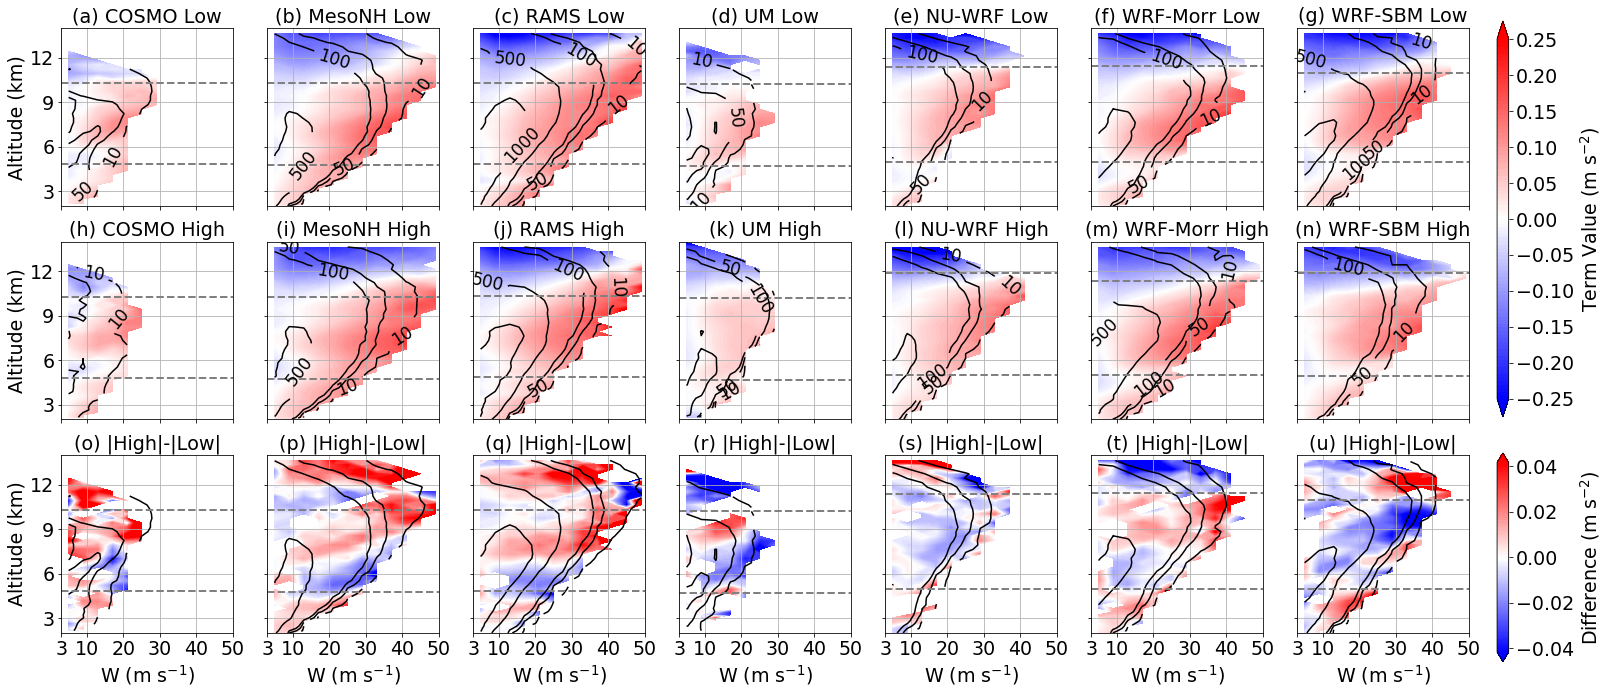

In [8]:
#plot_dir = '/group_workspaces/jasmin2/acpc/public/pmarin/UPDRAFTS/W_Terms/'
plot_dir = '/group_workspaces/jasmin2/acpc/public/pmarin/Manuscript/CFADS/'

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

c_lvls = [0,10,50,100,500,1000,5000,10000,15000,20000]

#terms = ['Term_TH_v2','Term_QV_v2','Term_TC','Term_VPGF_v2','Term_VADV','Term_HADV']; savenameadd = 'Sum_All'
#terms = ['Term_TH_v2','Term_QV_v2','Term_VPGF_v2']; savenameadd = 'SUM_BTH_BQV_VPGF';
#terms = ['Term_TH_v2','Term_VPGF_v2']; savenameadd = 'SUM_BTH_VPGF';
terms = ['Term_TH_v2','Term_QV_v2','Term_TC']; savenameadd ='Sum_Buoyancy'
#terms = ['Term_TH_v2','Term_QV_v2','Term_TC','Term_VPGF_v2']; savenameadd = 'Sum_Buoyancy_VPPG'
#terms = ['Term_TH_v2','Term_QV_v2']
#terms = ['Term_TH','Term_QV','TTWC','Term_VPGF','Term_VADV','Term_HADV']
#terms = ['Term_TH_v2','Term_QV_v2','Term_TC','Term_VPGF_v2']

t_lvls = np.arange(-0.25,0.25001,0.005); t2_lvls = t_lvls/6
tick_levels = np.arange(-0.25,0.25001,0.05); tick_levels2 = np.arange(-0.04,0.04001,0.02); 

#t_lvls = np.arange(-0.10,0.10001,0.002); t2_lvls = t_lvls/25
#tick_levels = np.arange(-0.10,0.10001,0.025); tick_levels2 = np.arange(-0.004,0.00401,0.002); 

fig,ax = plt.subplots(3,7,figsize=(23,10))
cntm = 0
for model in models:

    
    for ii in np.arange(0,len(terms)):
        if ii == 0:
            t_avg_c_all = t_avg_c[model][terms[ii]]
            t_avg_p_all = t_avg_p[model][terms[ii]]
        else:
            t_avg_c_all = t_avg_c_all + t_avg_c[model][terms[ii]]
            t_avg_p_all = t_avg_p_all + t_avg_p[model][terms[ii]]
    
    # CLEAN Simulation Plot
    a = ax[0,cntm].contourf(w_mid_c[model][tf],alt_c[model][tf]/1000,np.transpose(t_avg_c_all),levels=t_lvls,cmap=plt.cm.bwr,extend='both')

    if cntm == 6:
        fig.subplots_adjust(right=0.9)
        cbar_ax = fig.add_axes([0.917, 0.38, 0.007, 0.55])
        cbar1 = fig.colorbar(a, cax=cbar_ax)
        cbar1.set_ticks(tick_levels)
        cbar1.ax.tick_params(labelsize=fs2) 
        cbar1.ax.set_ylabel('Term Value (m s$^{-2}$)',fontsize=fs2)                        

    b = ax[0,cntm].contour(w_mid_c[model][tf],alt_c[model][tf]/1000,np.transpose(w_cnt_c[model][tf]),colors='k',levels=c_lvls)
    ax[0,cntm].clabel(b,fmt='%1.0f',fontsize=fsc)
    ax[0,cntm].plot([3,50],[z_0C[model,'CLN']/1000,z_0C[model,'CLN']/1000],'--',color=hline_color,lw=hline_size)     
    ax[0,cntm].plot([3,50],[z_38C[model,'CLN']/1000,z_38C[model,'CLN']/1000],'--',color=hline_color,lw=hline_size)     
    ax[0,cntm].set_ylim(ylims)
    ax[0,cntm].set_xlim(xlims)
    ax[0,cntm].set_yticks(yticks)
    ax[0,cntm].grid()
    ax[0,cntm].set_title(pn[model][0]+' '+mn[model][0]+' Low')
    ax[0,cntm].set_xticks(xticks)
    ax[0,cntm].set_xticklabels('')

    # POL Simulation Plot
    a = ax[1,cntm].contourf(w_mid_p[model][tf],alt_p[model][tf]/1000,np.transpose(t_avg_p_all),levels=t_lvls,cmap=plt.cm.bwr,extend='both')
    b = ax[1,cntm].contour(w_mid_p[model][tf],alt_p[model][tf]/1000,np.transpose(w_cnt_p[model][tf]),colors='k',levels=c_lvls)
    ax[1,cntm].clabel(b,fmt='%1.0f',fontsize=fsc)
    ax[1,cntm].plot([3,50],[z_0C[model,'POL']/1000,z_0C[model,'POL']/1000],'--',color=hline_color,lw=hline_size)
    ax[1,cntm].plot([3,50],[z_38C[model,'POL']/1000,z_38C[model,'POL']/1000],'--',color=hline_color,lw=hline_size)
    ax[1,cntm].set_ylim(ylims)
    ax[1,cntm].set_xlim(xlims)
    ax[1,cntm].grid()
    ax[1,cntm].set_title(pn[model][1]+' '+mn[model][0]+' High')
    ax[1,cntm].set_yticks(yticks)
    ax[1,cntm].set_xticks(xticks)
    ax[1,cntm].set_xticklabels('')

    plt_data = np.abs(t_avg_p_all) - np.abs(t_avg_c_all)
    import numpy.ma as ma
    plt_data = ma.masked_where(w_cnt_p[model][tf] < 1, plt_data)
    plt_data = ma.masked_where(w_cnt_c[model][tf] < 1, plt_data)
    plt_data = ma.masked_where(t_avg_p_all*t_avg_c_all < 0, plt_data)

    # Difference Simulation Plot
    a = ax[2,cntm].contourf(w_mid_p[model][tf],alt_p[model][tf]/1000,np.transpose(plt_data),levels=t2_lvls,cmap=plt.cm.bwr,extend='both')
    b = ax[2,cntm].contour(w_mid_c[model][tf],alt_c[model][tf]/1000,np.transpose(w_cnt_c[model][tf]),colors='k',levels=c_lvls)
    ax[2,cntm].plot([3,50],[z_0C[model,'CLN']/1000,z_0C[model,'CLN']/1000],'--',color=hline_color,lw=hline_size)   
    ax[2,cntm].plot([3,50],[z_38C[model,'CLN']/1000,z_38C[model,'CLN']/1000],'--',color=hline_color,lw=hline_size)    
    if cntm == 6:
        fig.subplots_adjust(right=0.9)
        cbar_ax = fig.add_axes([0.917, 0.04, 0.007, 0.29])
        cbar2 = fig.colorbar(a, cax=cbar_ax)            
        cbar2.set_ticks(tick_levels2)                        
        cbar2.ax.tick_params(labelsize=fs2) 
        cbar2.ax.set_ylabel('Difference (m s$^{-2}$)',fontsize=fs2)                           
        #        if cntm == 6:
    #    plt.colorbar(a,ax=ax[2,cntm])    

    ax[2,cntm].set_ylim(ylims)
    ax[2,cntm].set_xlim(xlims)
    ax[2,cntm].set_xlabel('W (m s$^{-1}$)',fontsize=fs2)   
    ax[2,cntm].grid()
    ax[2,cntm].set_title(pn[model][2]+' '+'|High|-|Low|')
    ax[2,cntm].set_xticks(xticks)
    ax[2,cntm].set_yticks(yticks)

    if cntm == 0:
        for yy in np.arange(0,3):
            ax[yy,cntm].set_ylabel('Altitude (km)',fontsize=fs2)
    else:
        for yy in np.arange(0,3):
            ax[yy,cntm].set_yticklabels('')

    cntm = cntm + 1

for ii in np.arange(0,3):
    for jj in np.arange(0,7):
        for tick in ax[ii,jj].xaxis.get_major_ticks():
            tick.label.set_fontsize(fs2) 
        for tick in ax[ii,jj].yaxis.get_major_ticks():
            tick.label.set_fontsize(fs2) 
fig.subplots_adjust(left=0.05,bottom=0.08,top=0.92)                

plt.savefig(plot_dir+'xAllModels_'+savenameadd+str(thresh)+'_PHD.png')
plt.savefig(plot_dir+'xAllModels_'+savenameadd+str(thresh)+'_PHD.pdf')
plt.savefig(plot_dir+'xAllModels_'+savenameadd+str(thresh)+'_PHD.eps')

In [9]:
print(plot_dir)

/group_workspaces/jasmin2/acpc/public/acpc/pmarin/Plots_Apr2020/UPDRAFTS/CFADS/


In [28]:
hids = [2000, 8000]
fname = 'Term_VPGF_v2.nc'
filepath = os.path.join('/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/',model,case,'500m','5m',fname)
test = iris.load(filepath)
hgt = test[0].coord('geopotential_height').points
id1 = np.abs(hgt-hids[0]).argmin()
id2 = np.abs(hgt-hids[1]).argmin()

In [31]:
print(id1); print(id2)

21
45


In [33]:
hgt[45]

7870.1304

NameError: name 'plt' is not defined